# COMP2200  Portfolio 2

### Student ID: 45870969
### Name: Keerthana Kannan
### URL: https://github.com/MQCOMP2200-S2-2020/portfolio-2020-keerthanakannan24.git

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
import datetime
import warnings
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes = True)
from sklearn.linear_model import LogisticRegression
warnings.filterwarnings("ignore")
from scipy import stats
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

In [3]:
training_data = pd.read_csv('data/training.csv')
test_data = pd.read_csv('data/testing.csv')

#importing training and testing datasets

In [4]:
training_data.shape, test_data.shape

((14803, 32), (4932, 32))

In [5]:
training_data.head(), test_data.head()

(                  date  Appliances  lights     T1       RH_1    T2       RH_2  \
 0  2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
 1  2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
 2  2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
 3  2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   
 4  2016-01-11 17:50:00          50      40  19.89  46.026667  19.2  44.500000   
 
       T3       RH_3         T4  ...  Press_mm_hg  RH_out  Windspeed  \
 0  19.79  44.730000  19.000000  ...        733.5    92.0   7.000000   
 1  19.79  44.790000  19.000000  ...        733.6    92.0   6.666667   
 2  19.79  44.933333  18.926667  ...        733.7    92.0   6.333333   
 3  19.79  45.000000  18.890000  ...        733.9    92.0   5.666667   
 4  19.79  44.933333  18.890000  ...        734.0    92.0   5.333333   
 
    Visibility  Tdewpoint        rv1        rv2    NSM  WeekStatus  Day_

In [6]:
training_data.columns, test_data.columns

#listing the columns

(Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
        'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
        'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
        'Visibility', 'Tdewpoint', 'rv1', 'rv2', 'NSM', 'WeekStatus',
        'Day_of_week'],
       dtype='object'),
 Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
        'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
        'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
        'Visibility', 'Tdewpoint', 'rv1', 'rv2', 'NSM', 'WeekStatus',
        'Day_of_week'],
       dtype='object'))

In [7]:
training_data.isna().sum(), test_data.isna().sum()
#checking for NaN values 

(date           0
 Appliances     0
 lights         0
 T1             0
 RH_1           0
 T2             0
 RH_2           0
 T3             0
 RH_3           0
 T4             0
 RH_4           0
 T5             0
 RH_5           0
 T6             0
 RH_6           0
 T7             0
 RH_7           0
 T8             0
 RH_8           0
 T9             0
 RH_9           0
 T_out          0
 Press_mm_hg    0
 RH_out         0
 Windspeed      0
 Visibility     0
 Tdewpoint      0
 rv1            0
 rv2            0
 NSM            0
 WeekStatus     0
 Day_of_week    0
 dtype: int64,
 date           0
 Appliances     0
 lights         0
 T1             0
 RH_1           0
 T2             0
 RH_2           0
 T3             0
 RH_3           0
 T4             0
 RH_4           0
 T5             0
 RH_5           0
 T6             0
 RH_6           0
 T7             0
 RH_7           0
 T8             0
 RH_8           0
 T9             0
 RH_9           0
 T_out          0
 Press_mm_hg 

# Distribution of Energy Data

In [8]:
energy_data = pd.concat([training_data,test_data], ignore_index = True)
energy_data.shape

#combined testing and training data into new dataframe energy_data

(19735, 32)

In [9]:
energy_data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,NSM,WeekStatus,Day_of_week
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,61200,Weekday,Monday
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,61800,Weekday,Monday
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668,62400,Weekday,Monday
3,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097,63600,Weekday,Monday
4,2016-01-11 17:50:00,50,40,19.89,46.026667,19.2,44.500000,19.79,44.933333,18.890000,...,734.0,92.0,5.333333,43.833333,4.8,44.919484,44.919484,64200,Weekday,Monday


In [10]:
energy_data.columns

#listing all the columns combined to confirm

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2', 'NSM', 'WeekStatus',
       'Day_of_week'],
      dtype='object')

In [64]:
energy_data['date'] = pd.to_datetime(energy_data['date'])

energy_data['year'] = energy_data['date'].dt.year

energy_data['month'] = energy_data['date'].dt.month

energy_data['day'] = energy_data['date'].dt.day

energy_data['hour of day'] = energy_data['date'].dt.hour

energy_data.head()


#converting the date column into day, month and year to be able to see the distributions

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,Tdewpoint,rv1,rv2,NSM,WeekStatus,Day_of_week,year,month,day,hour of day
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,5.3,13.275433,13.275433,61200,Weekday,Monday,2016,1,11,17
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,5.2,18.606195,18.606195,61800,Weekday,Monday,2016,1,11,17
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,5.1,28.642668,28.642668,62400,Weekday,Monday,2016,1,11,17
3,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,4.9,10.084097,10.084097,63600,Weekday,Monday,2016,1,11,17
4,2016-01-11 17:50:00,50,40,19.89,46.026667,19.2,44.500000,19.79,44.933333,18.890000,...,4.8,44.919484,44.919484,64200,Weekday,Monday,2016,1,11,17


In [65]:
train = training_data.drop(['date','Appliances', 'Visibility','rv1','rv2','WeekStatus','Day_of_week'], axis = 1)
train_half = train.join(pd.get_dummies(training_data.WeekStatus))
train_full = train_half.join(pd.get_dummies(training_data.Day_of_week))

In [66]:
train_full.head()

,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,NSM,Weekday,Weekend,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,...,61200,1,0,0,1,0,0,0,0,0
1,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,...,61800,1,0,0,1,0,0,0,0,0
2,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,...,62400,1,0,0,1,0,0,0,0,0
3,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,...,63600,1,0,0,1,0,0,0,0,0
4,40,19.89,46.026667,19.2,44.500000,19.79,44.933333,18.890000,45.730000,17.133333,...,64200,1,0,0,1,0,0,0,0,0


In [67]:
test = test_data.drop(['date','Appliances', 'Visibility','rv1','rv2','WeekStatus','Day_of_week'], axis = 1)
test_half = test.join(pd.get_dummies(test_data.WeekStatus))
test_full = test_half.join(pd.get_dummies(test_data.Day_of_week))
#joinging test data with dropped values and test_half with Day of week

In [68]:
test_full.head()

,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,NSM,Weekday,Weekend,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,40,19.890000,46.066667,19.200000,44.590000,19.79,45.000000,18.89,45.723333,17.166667,...,63000,1,0,0,1,0,0,0,0,0
1,50,19.890000,45.766667,19.200000,44.500000,19.79,44.900000,18.89,45.790000,17.100000,...,64800,1,0,0,1,0,0,0,0,0
2,70,19.926667,45.863333,19.356667,44.400000,19.79,44.900000,18.89,46.430000,17.100000,...,67200,1,0,0,1,0,0,0,0,0
3,60,20.066667,46.396667,19.426667,44.400000,19.79,44.826667,19.00,46.430000,17.100000,...,67800,1,0,0,1,0,0,0,0,0
4,10,20.566667,53.893333,20.033333,46.756667,20.10,48.466667,19.00,48.490000,17.150000,...,70200,1,0,0,1,0,0,0,0,0


In [69]:
x_train = train_full
y_train = training_data.Appliances
x_test = test_full
y_test = test_data.Appliances

#creating x_train and y_test

In [70]:
lr = linear_model.LinearRegression()
#linear model 

In [71]:
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

#Predicting linear regression for x_test

In [72]:
def mean_absolute_percentage_error(y_true,y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred)/y_true))* 100

#finding the mean absolute percentage error

In [73]:
RMSE = sqrt(mean_squared_error(y_test, y_pred))
R2 =  r2_score(y_test,y_pred)
MAE = mean_absolute_error(y_test,y_pred)
MAPE = mean_absolute_percentage_error(y_test,y_pred)

In [74]:
print('RMSE',RMSE,'R2:',R2,'MAE:',MAE,'MAPE:',MAPE)

RMSE 93.21603874209941 R2: 0.158292050824845 MAE: 51.98273483514506 MAPE: 59.97773058185587


In [75]:
lr.fit(x_train,y_train)
y1_pred = lr.predict(x_train)

#fitting the x_train and y_train model

In [76]:
RMSE = sqrt(mean_squared_error(y_train, y1_pred))
R2 = r2_score(y_train,y1_pred)
MAE = mean_absolute_error(y_train,y1_pred)
MAPE = mean_absolute_percentage_error(y_train,y1_pred)

In [77]:
print('RMSE',RMSE,'R2:',R2,'MAE:',MAE,'MAPE:',MAPE)

RMSE 93.23321428000587 R2: 0.17785633861121697 MAE: 53.128328740174084 MAPE: 61.32477920841786


Text(0.5, 1.0, 'Appliances')

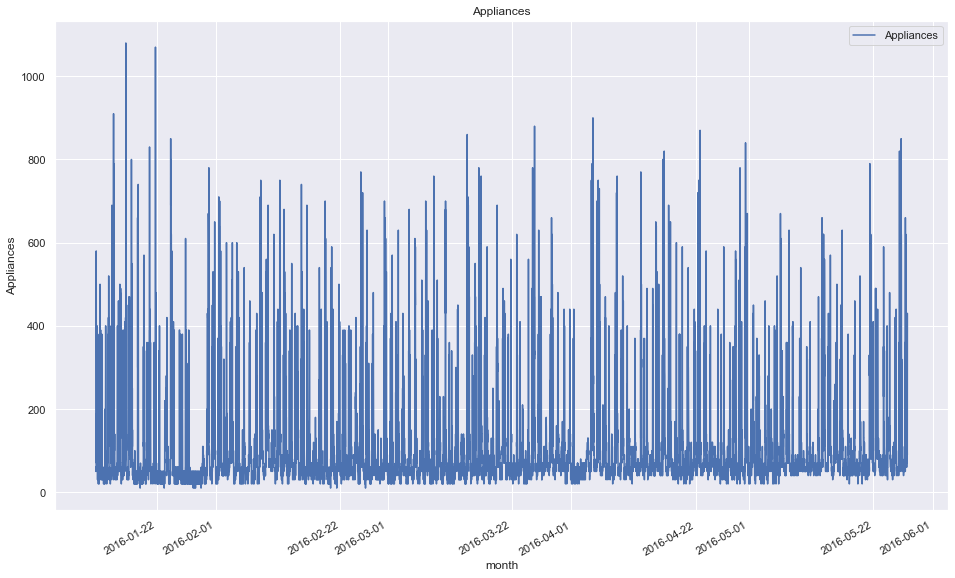

In [78]:
#edit this (whole period (Jan-Jun))
energy_data.plot(y ='Appliances', x = 'date') 
plt.xlabel('month')
plt.ylabel('Appliances')
plt.title('Appliances')

In [ ]:
#From the plot above it indicates that the lowest appliance usuage was around beinging of feburary and april and highest was around January.

<AxesSubplot:>

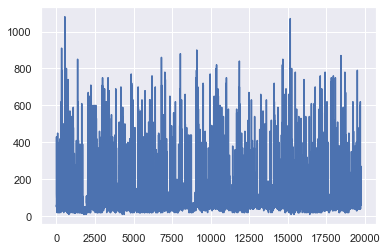

In [25]:
energy_data.Appliances.plot()

# Histogram of Appliances Distribution

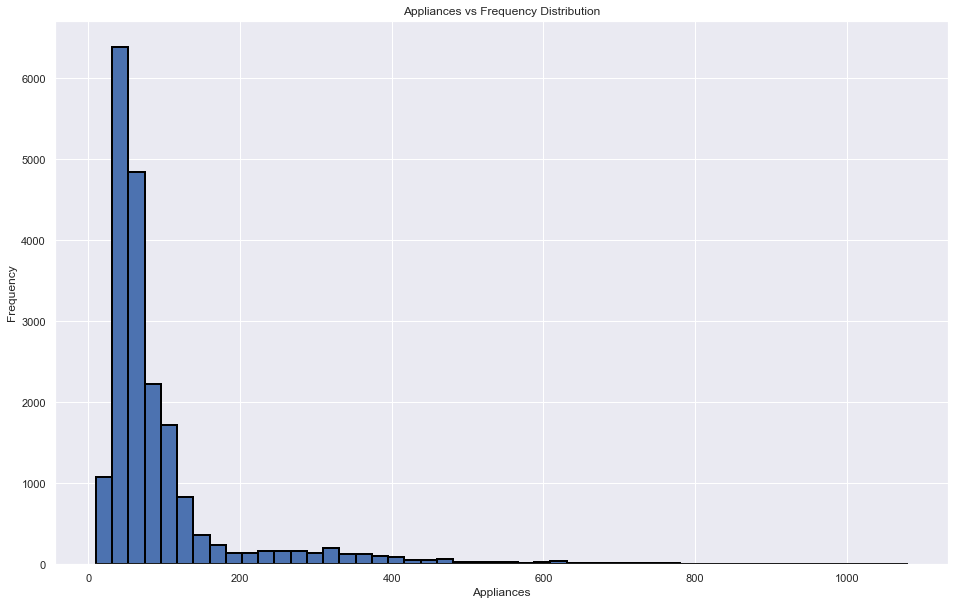

In [35]:
#histogram of appliances vs frequency 
plt.hist(energy_data.Appliances, bins=50, edgecolor='black', linewidth=2.0)
plt.rcParams["figure.figsize"] = [16,10]
plt.title("Appliances vs Frequency Distribution")
plt.xlabel("Appliances")
plt.ylabel("Frequency")
plt.show()

In [ ]:
#More appliances used, lower the frequency

# Boxplot of Appliances Distribution

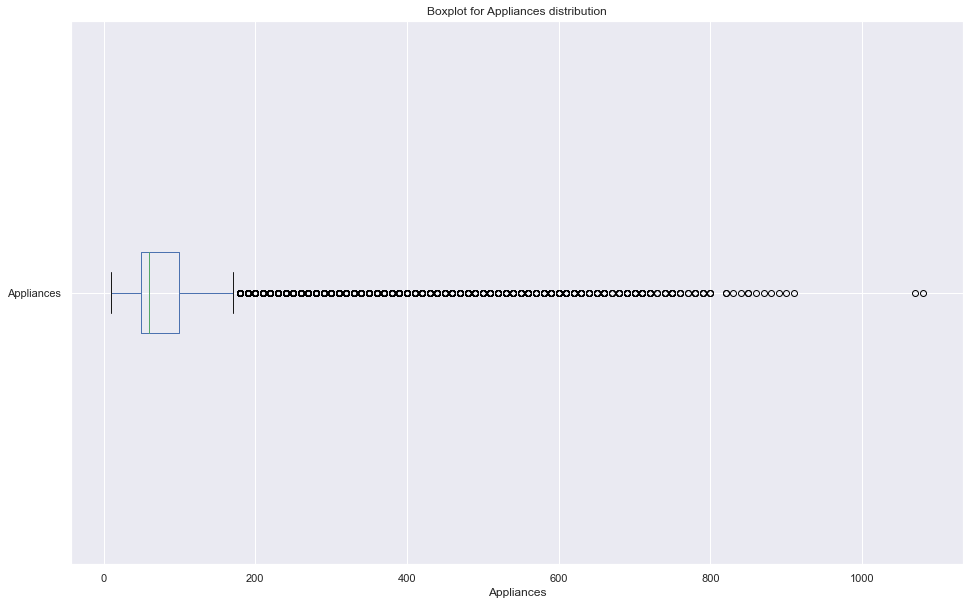

In [36]:
#boxplot
energy_data.Appliances.plot.box(vert=False)
plt.xlabel('Appliances')
plt.title("Boxplot for Appliances distribution")
plt.show()

In [ ]:
#incrediably varying amounts of appliances used according to the boxplot above

# Pairplot- Appliances

In [37]:
def disp_pearson(x, y, **kws):
    corrmat = np.corrcoef(x,y)
    pearson = round(corrmat[0, 1], 2)
    ax = plt.gca()
    ax.annotate(pearson, [.5, .5], xycoords = "axes fraction", ha = "center", va='center', fontsize = 30)

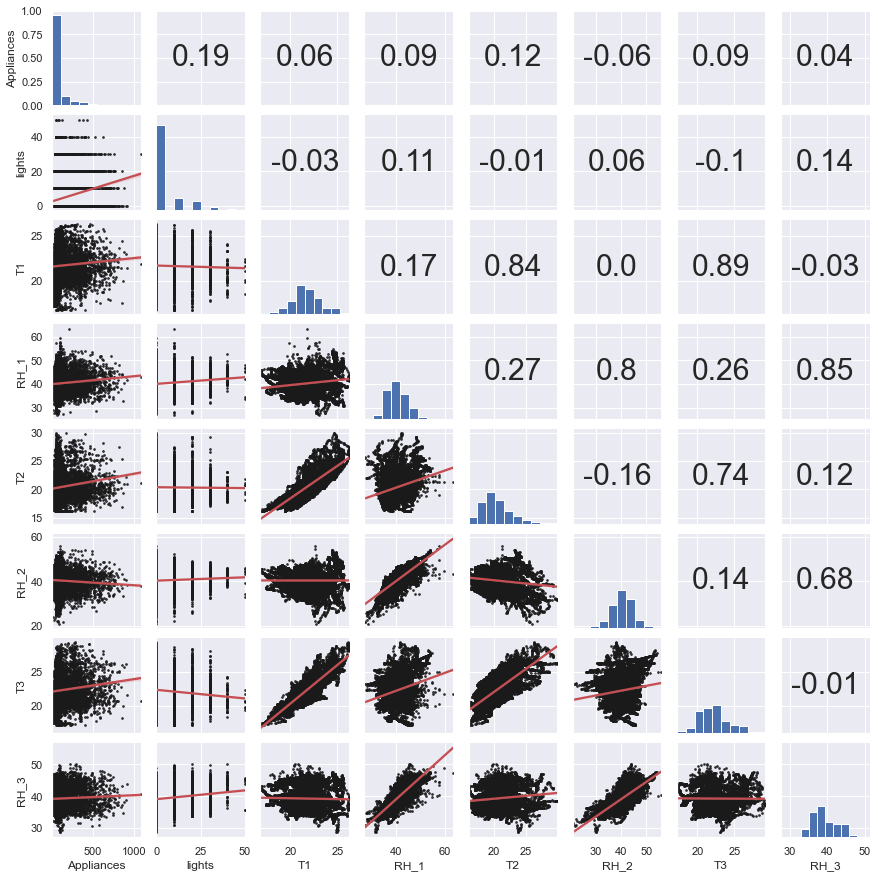

In [38]:
#pairplot
scatterdata = training_data[['Appliances', 'lights', 'T1', 'RH_1', 'T2',
            'RH_2', 'T3', 'RH_3']]

s = sns.PairGrid(scatterdata, height =1.5)
s = s.map_diag(plt.hist)
s = s.map_lower(sns.regplot, color = 'k', scatter_kws={"s":3}, line_kws={'color' :'r'})
s = s.map_upper(disp_pearson)

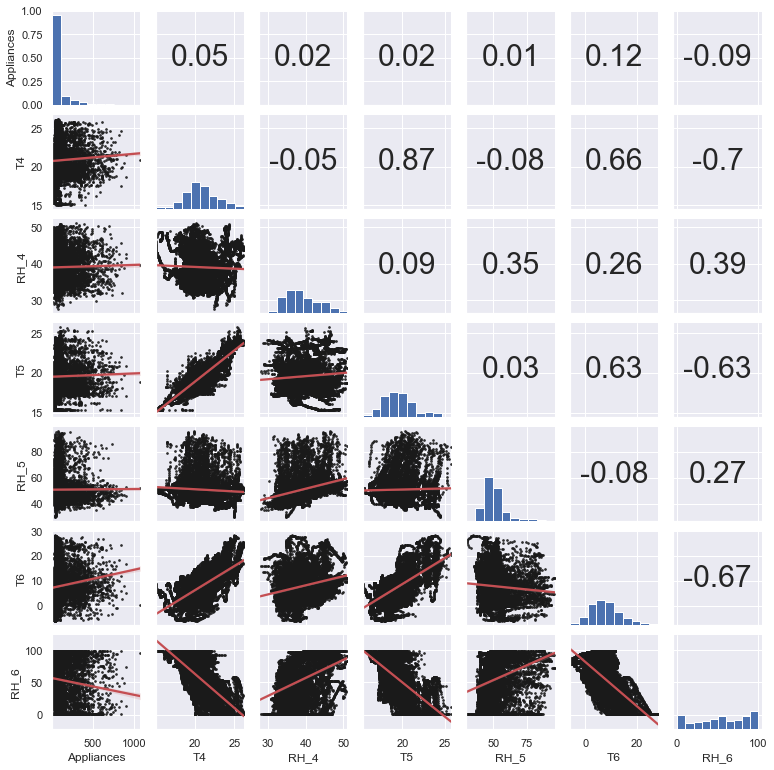

In [39]:
#Second pairplot 
scatterdata = training_data[['Appliances', 'T4', 'RH_4', 'T5', 'RH_5',
            'T6', 'RH_6']]

s = sns.PairGrid(scatterdata, height =1.5)
s = s.map_diag(plt.hist)
s = s.map_lower(sns.regplot, color = 'k', scatter_kws={"s":3}, line_kws={'color' :'r'})
s = s.map_upper(disp_pearson)

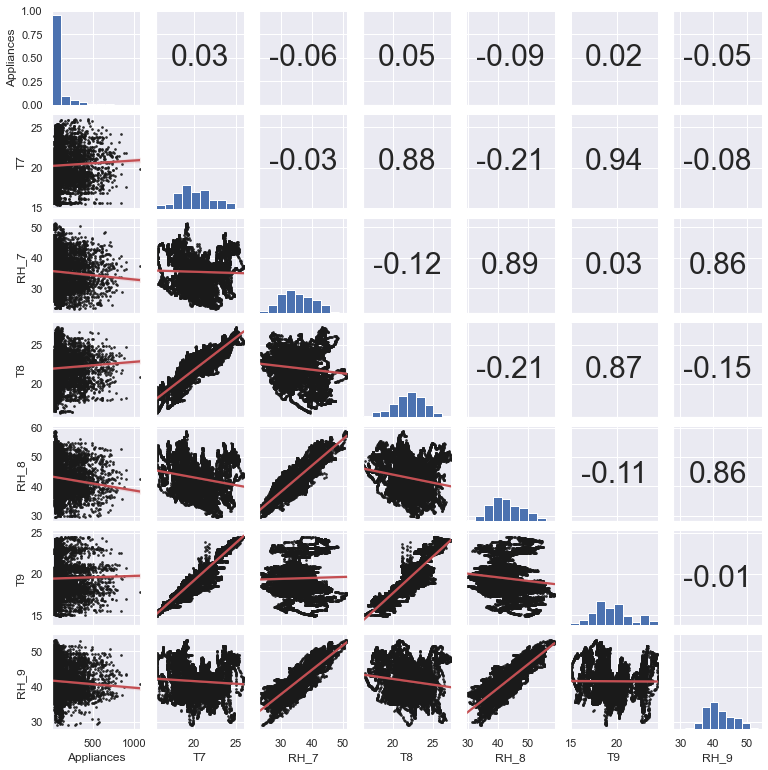

In [40]:
#third pairplot 
scatterdata = training_data[['Appliances', 'T7', 'RH_7', 'T8', 'RH_8',
            'T9', 'RH_9']]

s = sns.PairGrid(scatterdata, height =1.5)
s = s.map_diag(plt.hist)
s = s.map_lower(sns.regplot, color = 'k', scatter_kws={"s":3}, line_kws={'color' :'r'})
s = s.map_upper(disp_pearson)

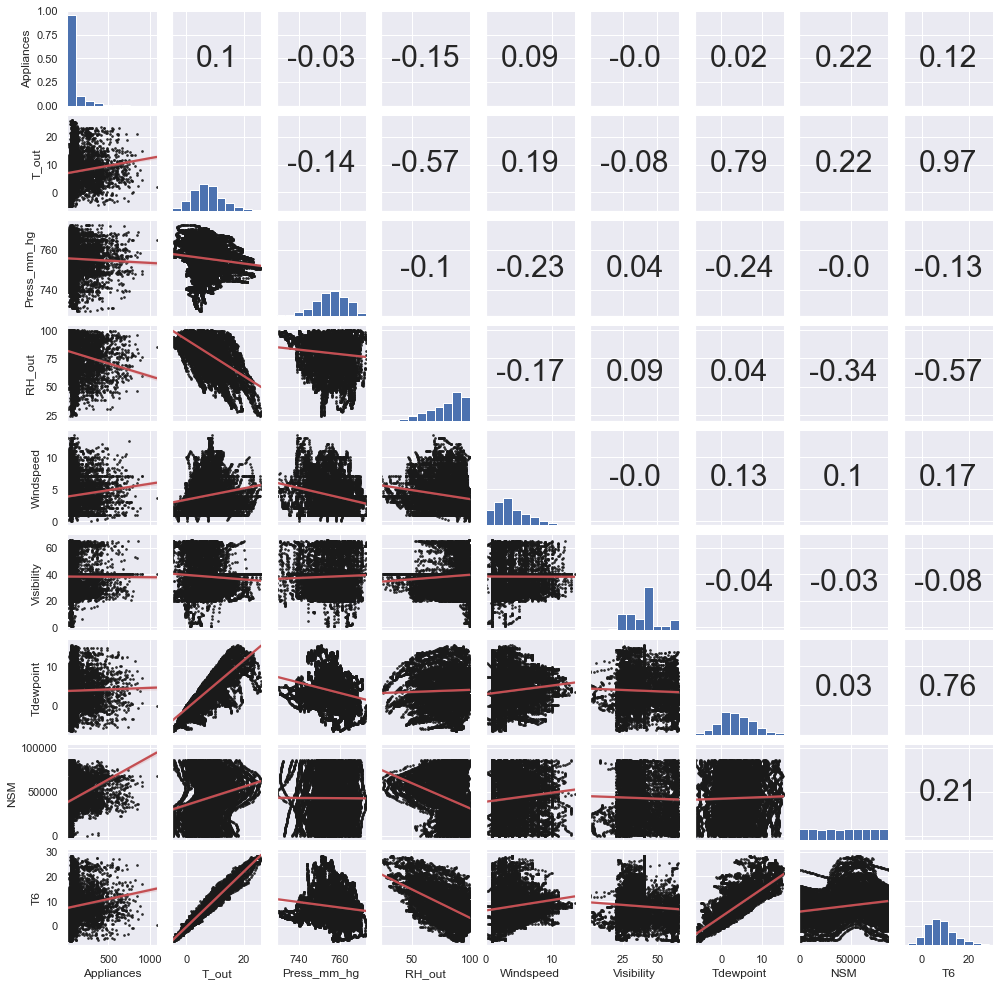

In [41]:
#fourth pairplot 
scatterdata = training_data[['Appliances', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
            'Visibility', 'Tdewpoint', 'NSM', 'T6' ]]

s = sns.PairGrid(scatterdata, height =1.5)
s = s.map_diag(plt.hist)
s = s.map_lower(sns.regplot, color = 'k', scatter_kws={"s":3}, line_kws={'color' :'r'})
s = s.map_upper(disp_pearson)

## Hourly Energy Consumption of Appliances Heat Map

In [79]:
#hm = sns.heatmap(energy_data,cmap="YlGnBu")


heatmap_data = pd.pivot_table(energy_data, values='Appliances', 
                     index=['hour of day'], 
                     columns='Day_of_week')


<AxesSubplot:xlabel='Day_of_week', ylabel='hour of day'>

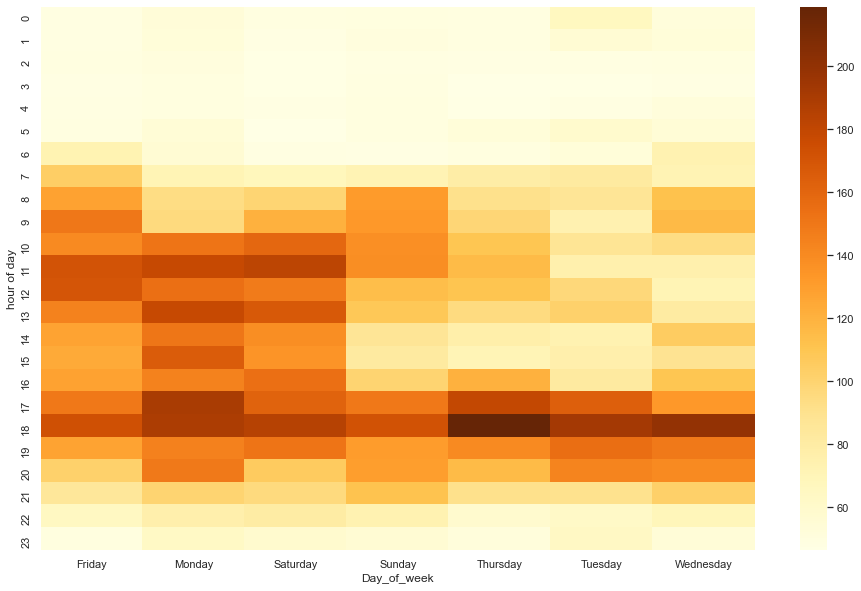

In [80]:
sns.heatmap(heatmap_data, cmap="YlOrBr")

In [81]:
#Heatmap shows that the most appliances used was from around 4-6pm everyday and especially high on Thurday 6pm

## RMSE Scores and Plot

In [48]:
estimator = linear_model.LinearRegression()
rmse_scores = []
for i in range(1,20):
    selector = RFE(estimator, n_features_to_select=i, step=1)
    selector = selector.fit(x_train, y_train)
    y_test_pred = selector.predict(x_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print("RMSE score on test set using", i, "features: ", rmse_test)
    rmse_scores.append(rmse_test)

RMSE score on test set using 1 features:  101.26888895164174
RMSE score on test set using 2 features:  99.12399407311727
RMSE score on test set using 3 features:  98.92249989546323
RMSE score on test set using 4 features:  97.97137950937748
RMSE score on test set using 5 features:  97.87877773888789
RMSE score on test set using 6 features:  97.79879832642703
RMSE score on test set using 7 features:  97.54264516067863
RMSE score on test set using 8 features:  97.4383034495254
RMSE score on test set using 9 features:  96.97841033120521
RMSE score on test set using 10 features:  95.04617607469439
RMSE score on test set using 11 features:  95.02193708768031
RMSE score on test set using 12 features:  94.90730063694622
RMSE score on test set using 13 features:  94.6886386020224
RMSE score on test set using 14 features:  94.70687758710379
RMSE score on test set using 15 features:  94.68431856934916
RMSE score on test set using 16 features:  94.69881903708233
RMSE score on test set using 17 fe

In [49]:
rmse_scores

[101.26888895164174,
 99.12399407311727,
 98.92249989546323,
 97.97137950937748,
 97.87877773888789,
 97.79879832642703,
 97.54264516067863,
 97.4383034495254,
 96.97841033120521,
 95.04617607469439,
 95.02193708768031,
 94.90730063694622,
 94.6886386020224,
 94.70687758710379,
 94.68431856934916,
 94.69881903708233,
 94.69881903708233,
 94.69881903708233,
 94.69881903708233]

In [51]:
model = linear_model.LinearRegression()
k = StratifiedKFold(n_splits=5, random_state=42)
rfecv = RFECV(estimator=model, step=1, cv=k, scoring='neg_mean_squared_error')
rfecv = rfecv.fit(x_train, y_train)

In [52]:
# gathering the optimal number of features and the best features
print('Optimal number of features :', rfecv.n_features_)
print('Best features :', x_train.columns[rfecv.support_])

Optimal number of features : 22
Best features : Index(['lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T6', 'T8', 'RH_8',
       'T9', 'T_out', 'Windspeed', 'Weekday', 'Weekend', 'Friday', 'Monday',
       'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')


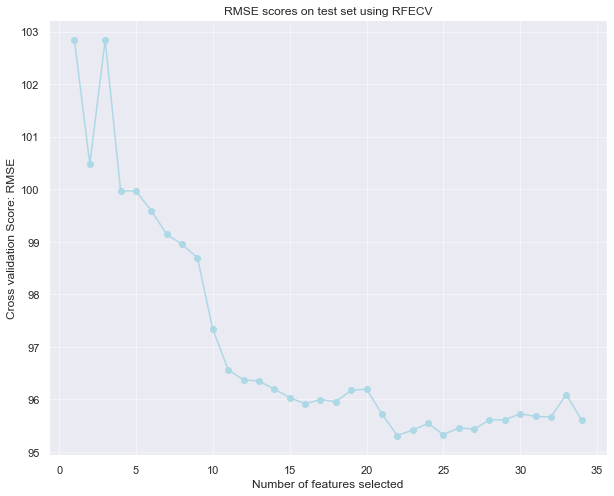

In [53]:
#plotting the RMSE scores on test
plt.figure(figsize=(10,8))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation Score: RMSE")
plt.title('RMSE scores on test set using RFECV')

rmse_cv_scores = np.sqrt(-rfecv.grid_scores_)

p = plt.plot(range(1, len(rfecv.grid_scores_) + 1), rmse_cv_scores, marker='o', color='lightblue')
plt.grid(alpha=0.5)
plt.show()

In [54]:
#As the cross validation score (RMSE) decreased the number of features selected increases

### Summary

This portfolio displays several data analysis using plots and other features. The Analysis of the energy data allowed several plotting and distribution to explore in order to find correlations between then and do a thorough analysis. It allowed the break down of the data and look closely at its distribution using histograms, boxplot, pairplot, heatmap and Cross validation plot.